# Notebook de Gráficas del Titanic
Este notebook genera todas las gráficas utilizadas en la presentación.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="whitegrid")
titanic = sns.load_dataset('titanic')
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


## Gráfica 1 – Mortalidad global

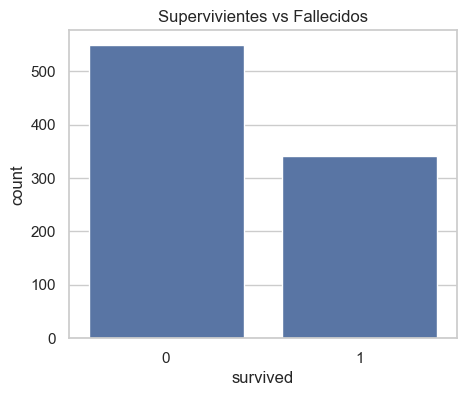

In [2]:
plt.figure(figsize=(5,4))
ax=sns.countplot(data=titanic, x='survived')
plt.title('Supervivientes vs Fallecidos')
plt.savefig('grafica1_mortalidad.png', dpi=150)
plt.show()

## Gráfica 2 – Supervivencia por sexo

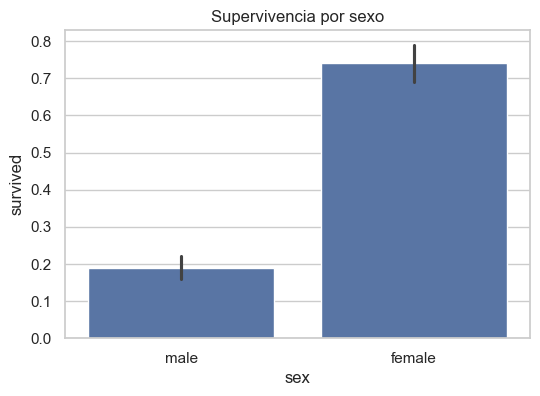

In [3]:
plt.figure(figsize=(6,4))
sns.barplot(data=titanic, x='sex', y='survived')
plt.title('Supervivencia por sexo')
plt.savefig('grafica2_sexo.png', dpi=150)
plt.show()

## Gráfica 3 – Supervivencia por clase

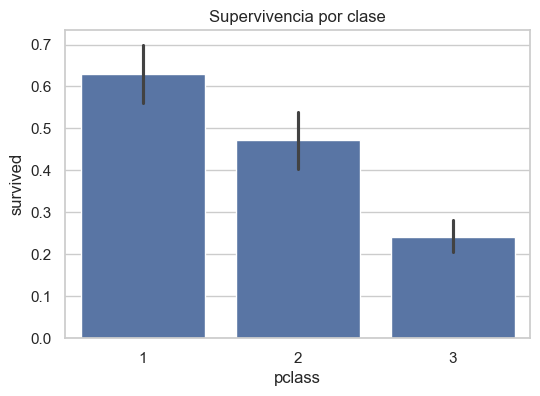

In [4]:
plt.figure(figsize=(6,4))
sns.barplot(data=titanic, x='pclass', y='survived')
plt.title('Supervivencia por clase')
plt.savefig('grafica3_clase.png', dpi=150)
plt.show()

## Gráfica 4 – Mujeres, hombres y niños

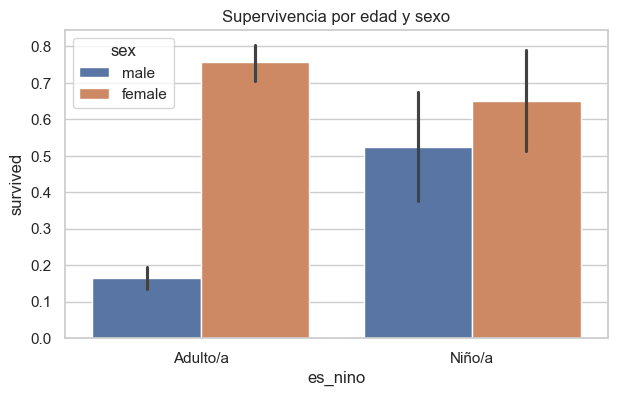

In [5]:
titanic['es_nino']=np.where(titanic['age']<16,'Niño/a','Adulto/a')
plt.figure(figsize=(7,4))
sns.barplot(data=titanic, x='es_nino', y='survived', hue='sex')
plt.title('Supervivencia por edad y sexo')
plt.savefig('grafica4_ninos.png', dpi=150)
plt.show()

## Gráfica 5 – Puerto × Clase × Supervivencia

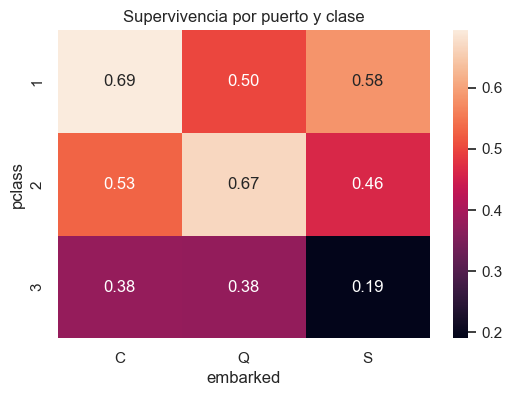

In [6]:
tabla=titanic.groupby(['embarked','pclass'])['survived'].mean().reset_index()
pivot=tabla.pivot(index='pclass', columns='embarked', values='survived')
plt.figure(figsize=(6,4))
sns.heatmap(pivot, annot=True, fmt='.2f')
plt.title('Supervivencia por puerto y clase')
plt.savefig('grafica5_puerto_clase.png', dpi=150)
plt.show()